# Exploratory Data Analysis

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [131]:
loan = pd.read_csv('datasets\loan_data.csv') 
loan.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [132]:
loan.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [133]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

## Fixing Outliers in Numeric Features

In [134]:
numeric_columns = loan.select_dtypes(include=['number']).columns
numeric_columns

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status'],
      dtype='object')

In [140]:
discrete_cols = loan[['person_age', 'person_gender','previous_loan_defaults_on_file']]
continuous_cols = loan[['person_income','person_emp_exp','loan_amnt', 'loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score']]
continuous_cols

,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
0,71948.0,0,8000.0,16.02,0.12,3.0,561
1,12282.0,0,1000.0,11.14,0.08,2.0,504
2,12438.0,3,5500.0,12.87,0.12,3.0,635
3,79753.0,0,8000.0,15.23,0.12,2.0,675
4,66135.0,1,8000.0,14.27,0.12,4.0,586
...,...,...,...,...,...,...,...
44995,47971.0,6,15000.0,15.66,0.31,3.0,645
44996,65800.0,17,9000.0,14.07,0.14,11.0,621
44997,56942.0,7,2771.0,10.02,0.05,10.0,668
44998,33164.0,4,12000.0,13.23,0.36,6.0,604


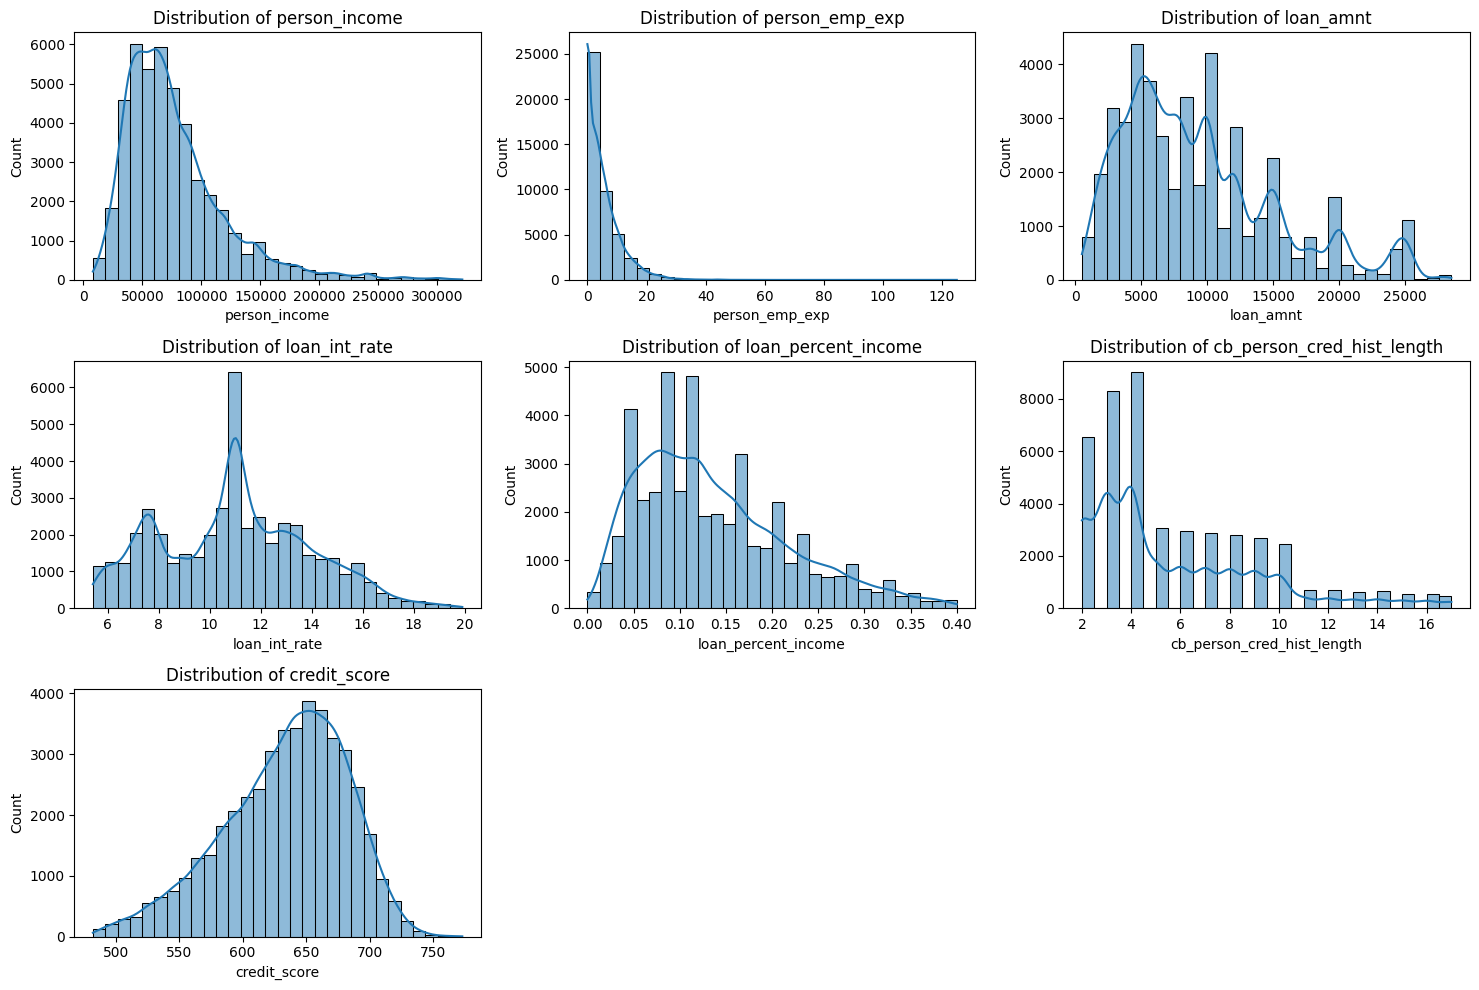

In [142]:
# Visualizing the distribution of continuous variables
plt.figure(figsize=(15, 10))
num_cols = len(continuous_cols.columns)
for i, col in enumerate(continuous_cols.columns):
    plt.subplot(3, 3, i + 1)  # 3 rows, 3 columns to fit 7 plots
    sns.histplot(loan[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


In [143]:
#ranges of continuous variables
ranges = {}
for col in continuous_cols.columns:
    min_val = loan[col].min()
    max_val = loan[col].max()
    ranges[col] = (min_val, max_val)
ranges

{'person_income': (8000.0, 321399.0),
 'person_emp_exp': (0, 125),
 'loan_amnt': (500.0, 28523.0),
 'loan_int_rate': (5.42, 19.91),
 'loan_percent_income': (0.0, 0.4),
 'cb_person_cred_hist_length': (2.0, 17.0),
 'credit_score': (482, 773)}

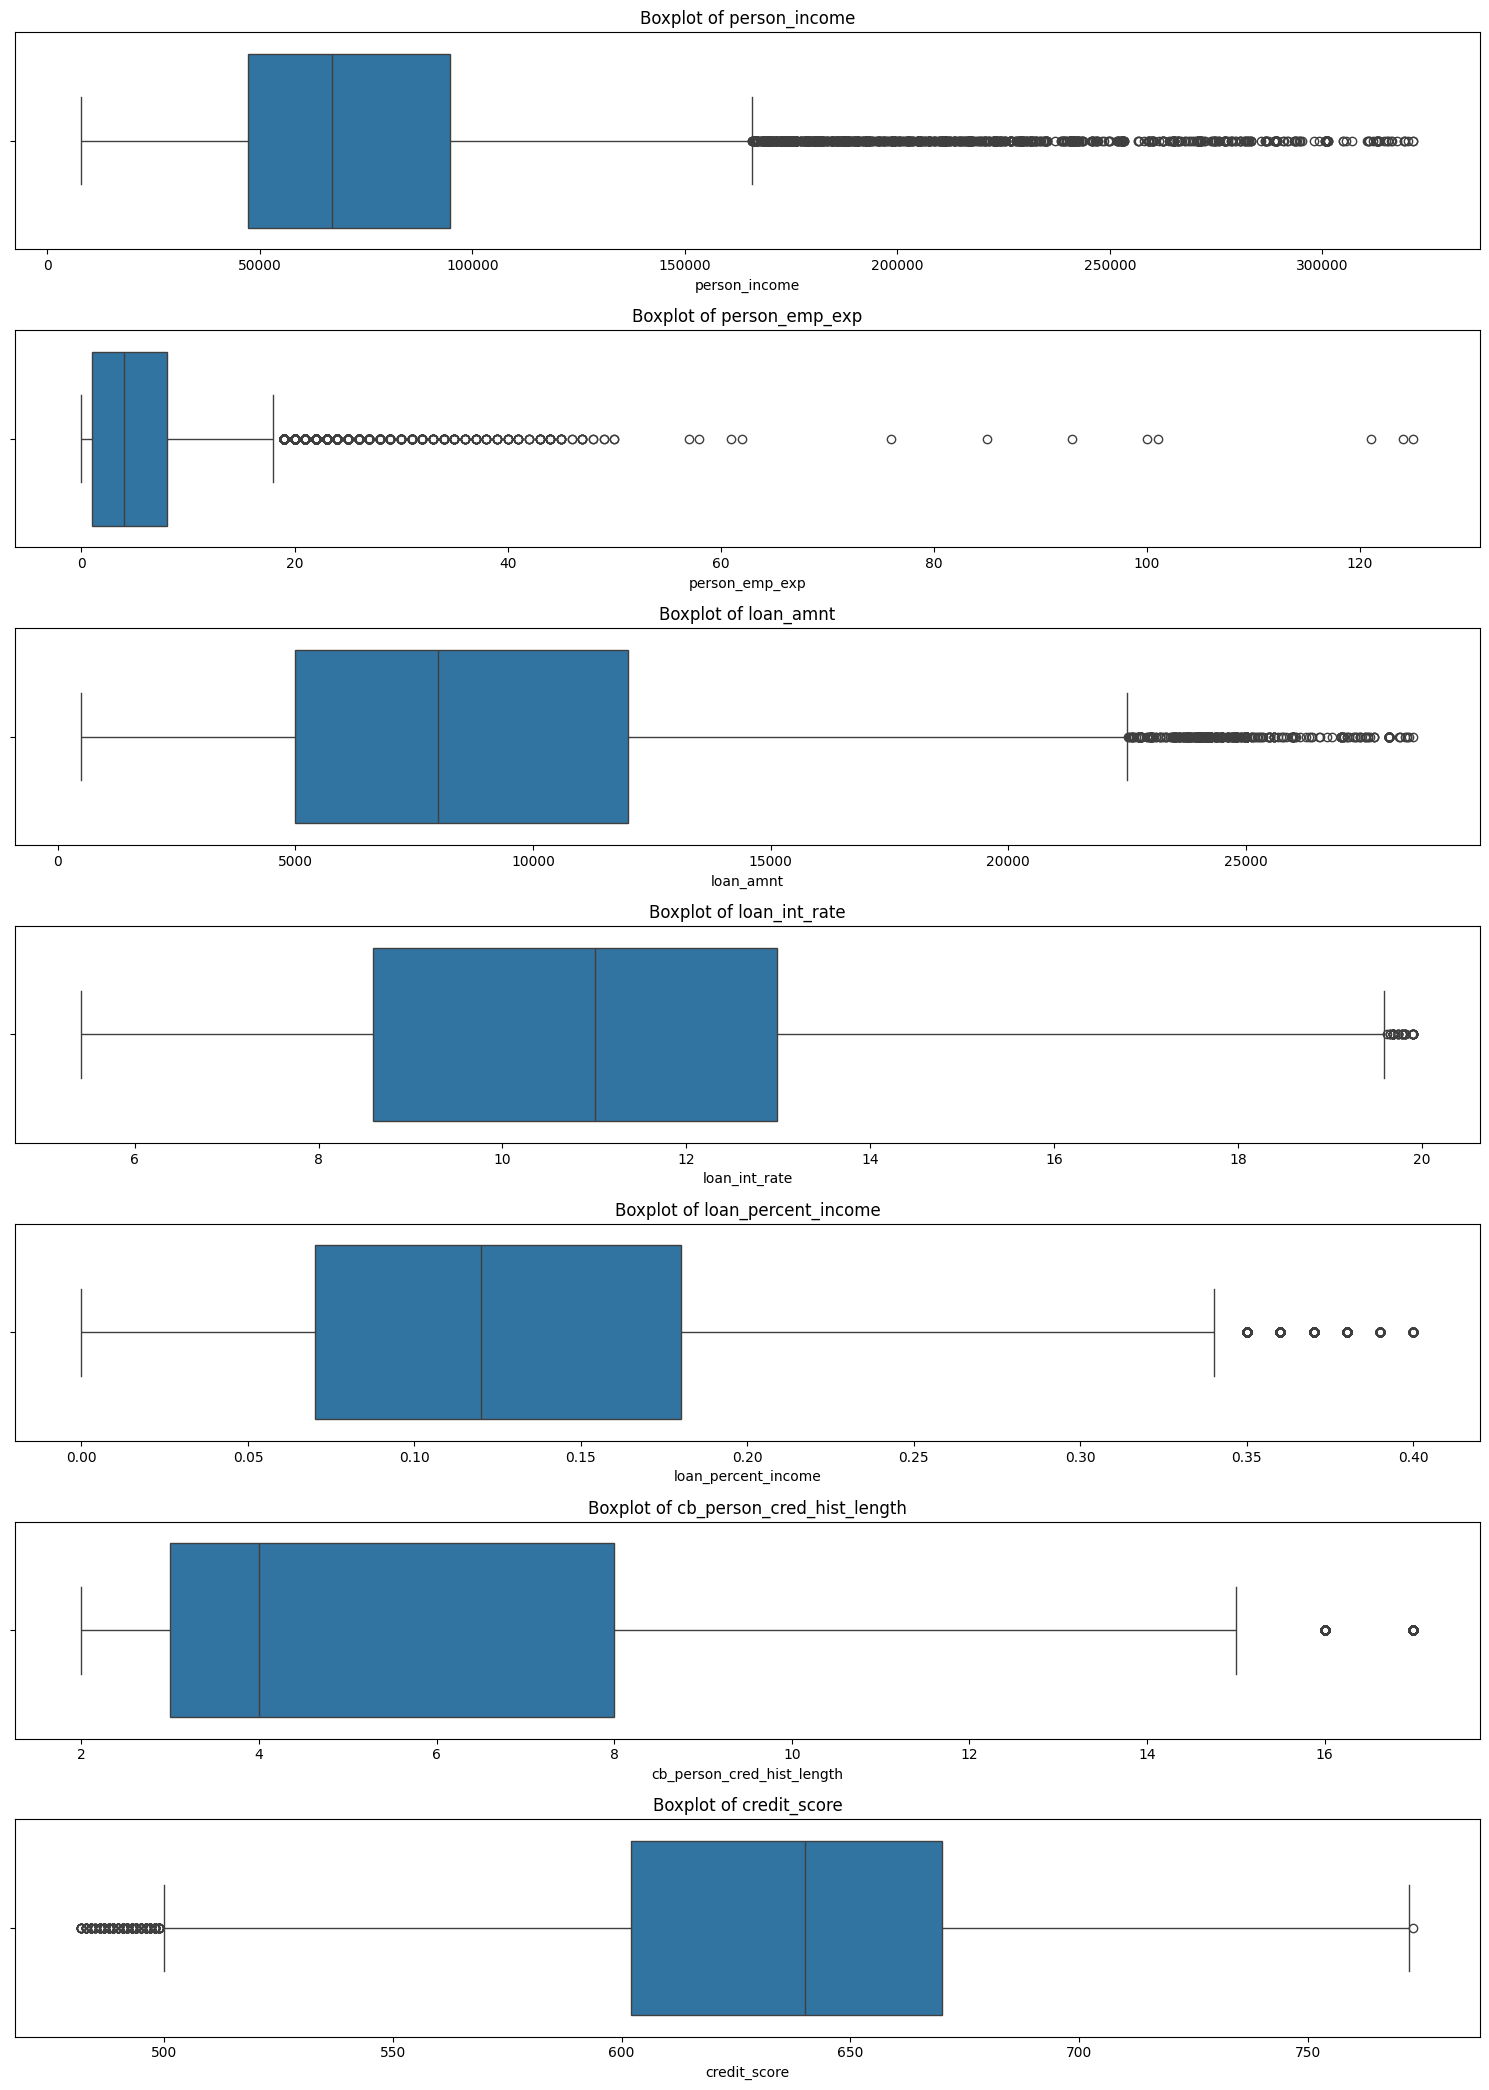

In [144]:
plt.figure(figsize=(15, 3 * len(continuous_cols.columns)))
for i, col in enumerate(continuous_cols.columns):
    plt.subplot(len(continuous_cols.columns), 1, i + 1)
    sns.boxplot(x=loan[col], orient='h')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

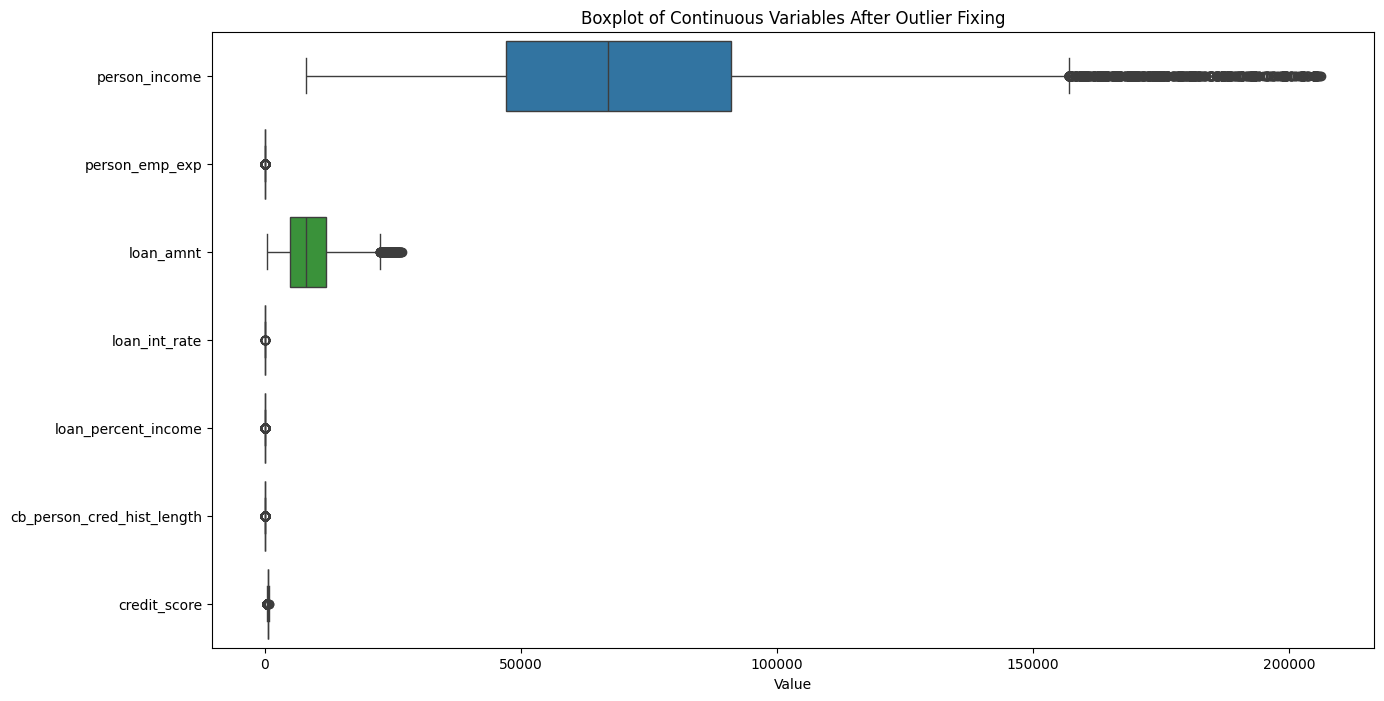

In [145]:
# Fix outliers using z-score (replace with median)
from scipy import stats
import numpy as np

for col in continuous_cols.columns:
    z_scores = np.abs(stats.zscore(loan[col]))
    outlier_mask = z_scores > 3
    loan.loc[outlier_mask, col] = loan[col].median()

# Visualize the columns again using boxplots to confirm outliers are fixed
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(data=loan[continuous_cols.columns], orient='h')
plt.title('Boxplot of Continuous Variables After Outlier Fixing')
plt.xlabel('Value')
plt.show()


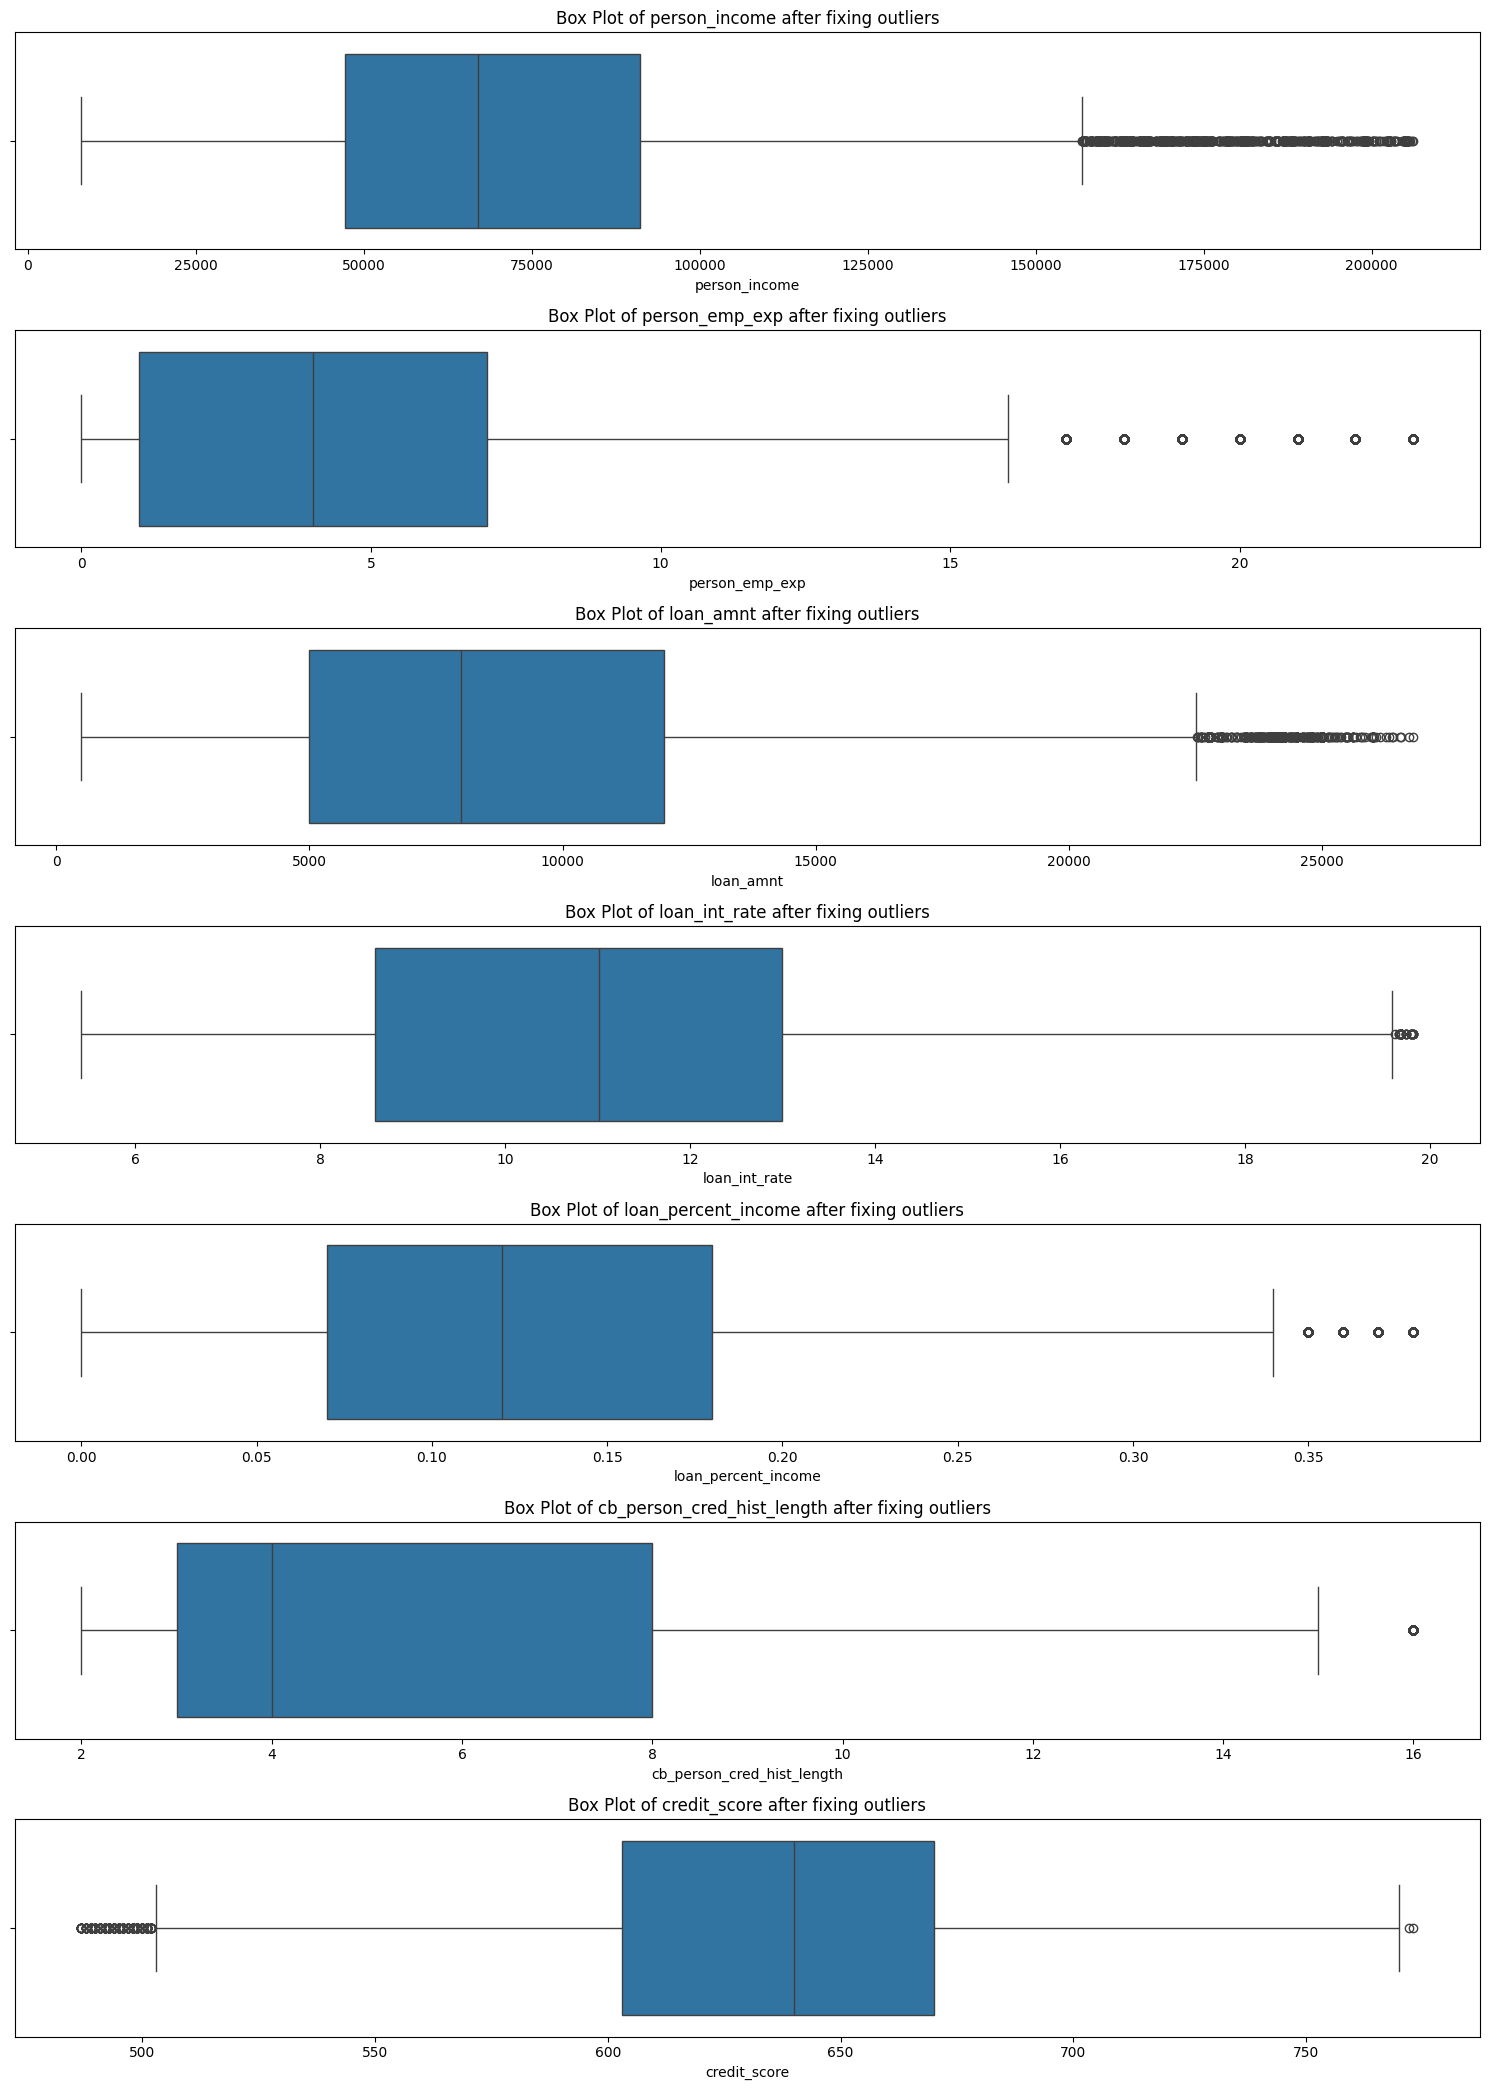

In [147]:
# Visualizing Outliers in continuous variables after fixing using box plots
num_cols = len(continuous_cols.columns)
plt.figure(figsize=(15, 3 * num_cols))
for i, col in enumerate(continuous_cols.columns):
    plt.subplot(num_cols, 1, i + 1)
    sns.boxplot(x=loan[col], orient='h')
    plt.title(f'Box Plot of {col} after fixing outliers')
plt.tight_layout()
plt.show()


## Encoding the categorical Features

In [148]:
cat_columns = loan.select_dtypes(include=['object']).columns
cat_columns

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')

In [149]:
for col in cat_columns:
    unique_values = loan[col].unique()
    print(f"Column: {col}, Unique Values: {unique_values}")

Column: person_gender, Unique Values: ['female' 'male']
Column: person_education, Unique Values: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
Column: person_home_ownership, Unique Values: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
Column: loan_intent, Unique Values: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
Column: previous_loan_defaults_on_file, Unique Values: ['No' 'Yes']


In [150]:
#Label Encoding for categorical variables of 2 unique values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
loan['person_gender'] = le.fit_transform(loan['person_gender'])
loan['previous_loan_defaults_on_file'] = le.fit_transform(loan['previous_loan_defaults_on_file'])

In [151]:
loan['person_education'].value_counts()

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

In [152]:
#Apply Ordinal Encoding to person_education as they are in  a order
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['High School','Associate','Bachelor', 'Master', 'Doctorate']])
loan['person_education'] = oe.fit_transform(loan[['person_education']])

In [153]:
loan['person_education'].value_counts()

person_education
2.0    13399
1.0    12028
0.0    11972
3.0     6980
4.0      621
Name: count, dtype: int64

In [154]:
cat_columns

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')

In [155]:
loan =  pd.get_dummies(loan, columns=['person_home_ownership','loan_intent'], dtype=int)

In [156]:
loan.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,3.0,71948.0,0,8000.0,16.02,0.12,3.0,561,...,0,0,0,1,0,0,0,0,1,0
1,21.0,0,0.0,12282.0,0,1000.0,11.14,0.08,2.0,504,...,0,0,1,0,0,1,0,0,0,0
2,25.0,0,0.0,12438.0,3,5500.0,12.87,0.12,3.0,635,...,1,0,0,0,0,0,0,1,0,0
3,23.0,0,2.0,79753.0,0,8000.0,15.23,0.12,2.0,675,...,0,0,0,1,0,0,0,1,0,0
4,24.0,1,3.0,66135.0,1,8000.0,14.27,0.12,4.0,586,...,0,0,0,1,0,0,0,1,0,0


## Feature Scaling

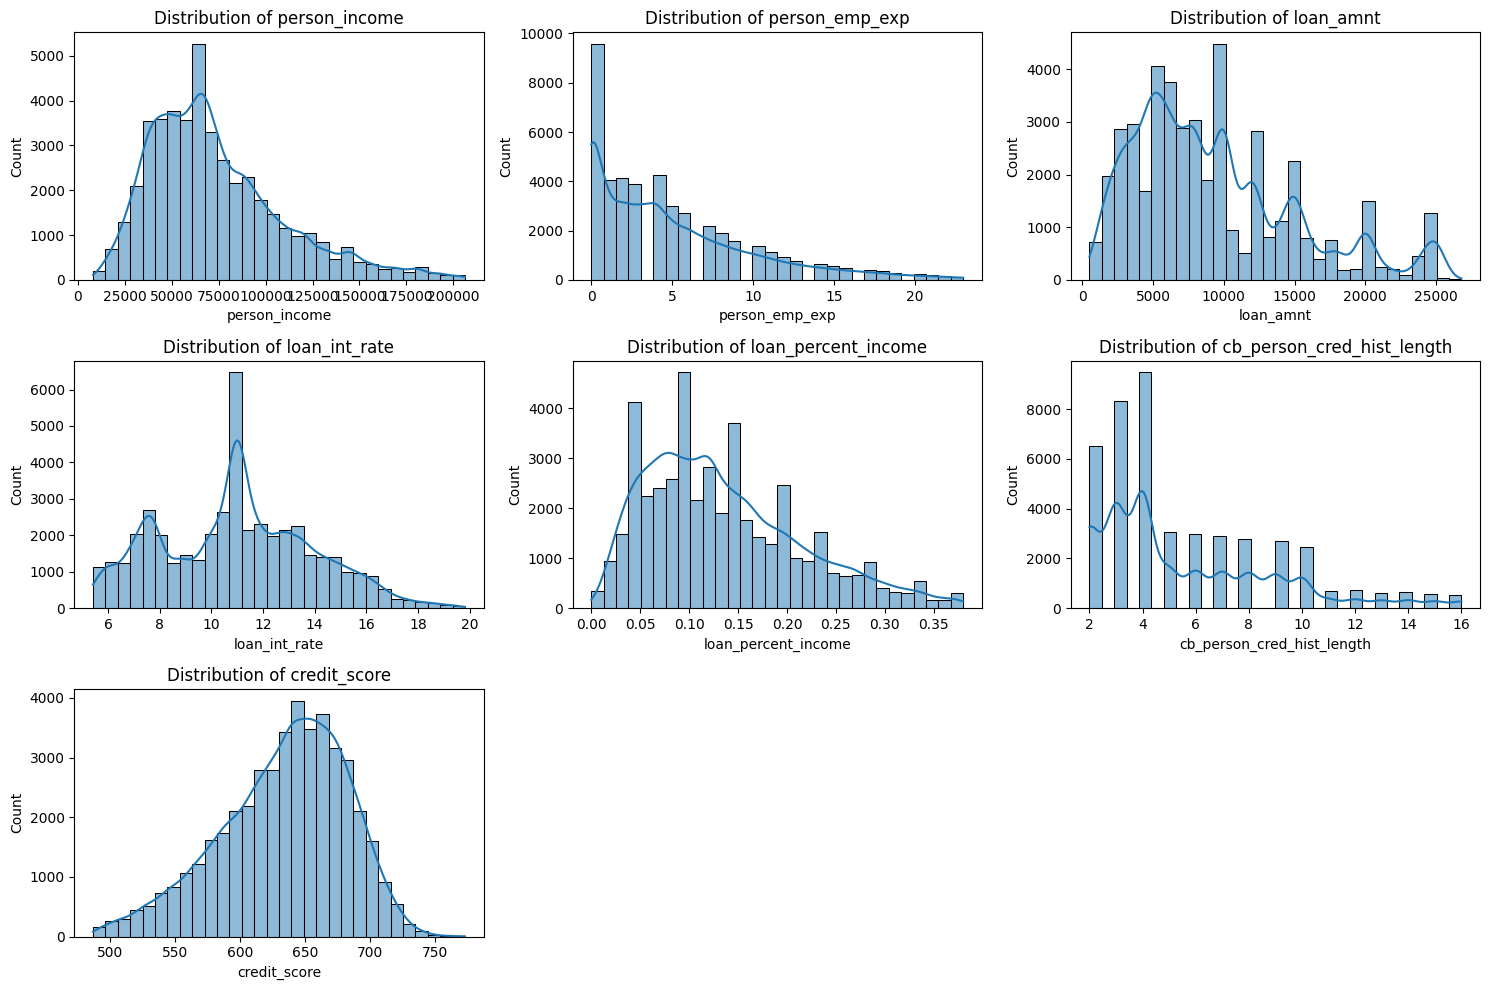

In [158]:
# Visualizing the distribution of continuous variables
plt.figure(figsize=(15, 10))
num_cols = len(continuous_cols.columns)
for i, col in enumerate(continuous_cols.columns):
    plt.subplot(3, 3, i + 1)  # 3 rows, 3 columns to fit 7 plots
    sns.histplot(loan[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


In [159]:
#ranges of continuous variables
ranges = {}
for col in continuous_cols.columns:
    min_val = loan[col].min()
    max_val = loan[col].max()
    ranges[col] = (min_val, max_val)
ranges

{'person_income': (8000.0, 206229.0),
 'person_emp_exp': (0, 23),
 'loan_amnt': (500.0, 26800.0),
 'loan_int_rate': (5.42, 19.82),
 'loan_percent_income': (0.0, 0.38),
 'cb_person_cred_hist_length': (2.0, 16.0),
 'credit_score': (487, 773)}

In [160]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
loan[continuous_cols.columns] = scaler.fit_transform(loan[continuous_cols.columns])

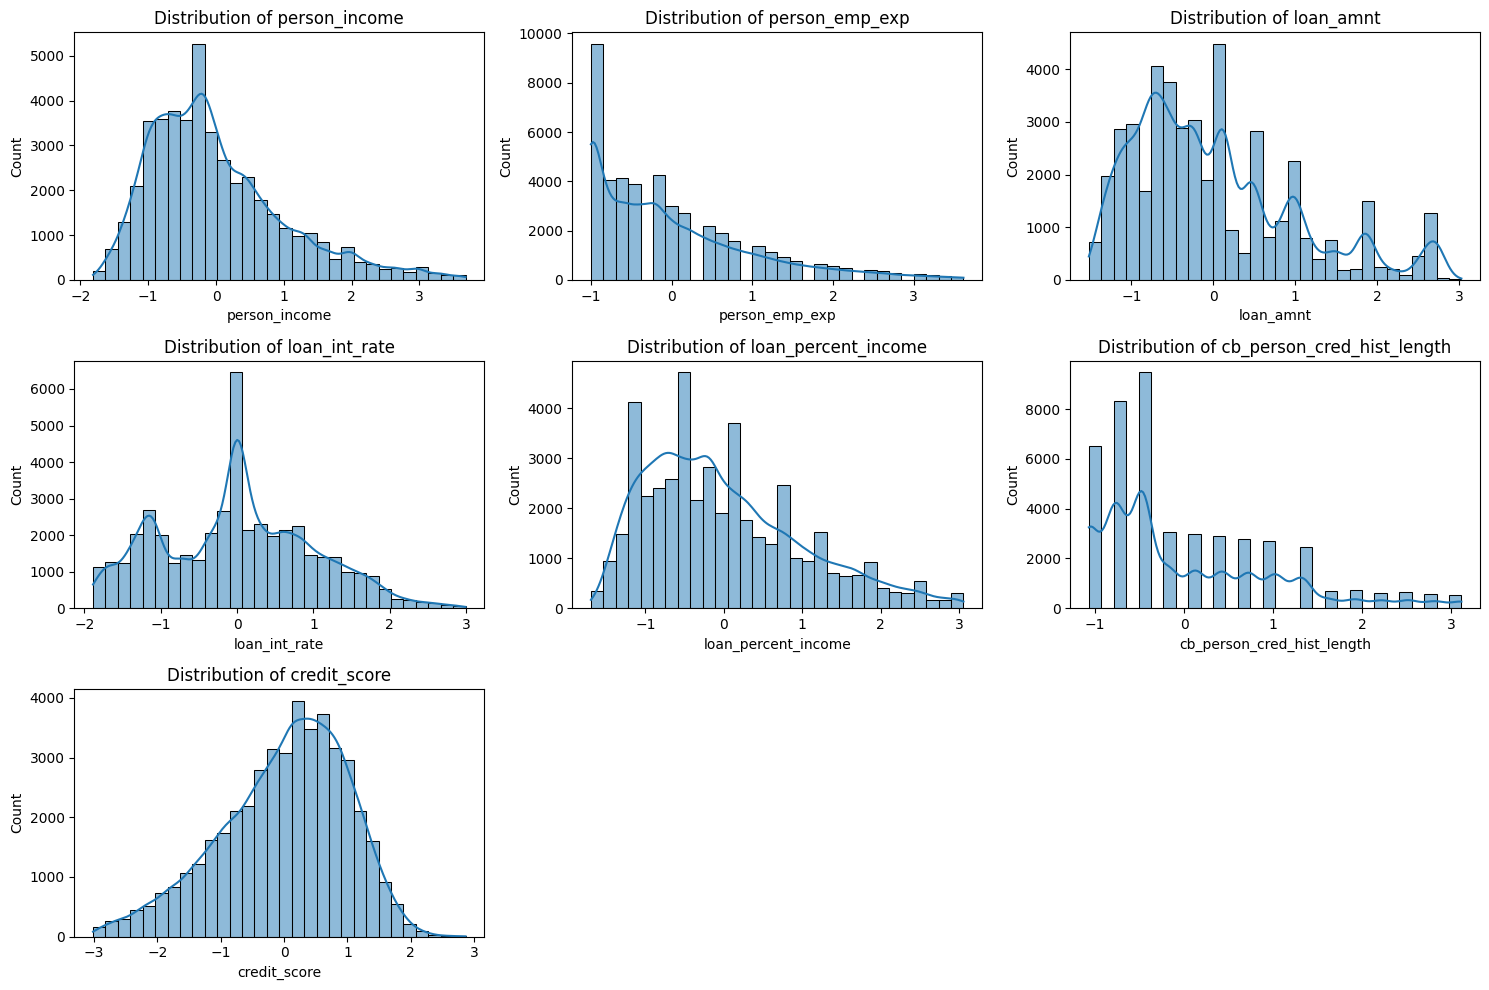

In [162]:
# Visualizing the distribution of continuous variables
plt.figure(figsize=(15, 10))
num_cols = len(continuous_cols.columns)
for i, col in enumerate(continuous_cols.columns):
    plt.subplot(3, 3, i + 1)  # 3 rows, 3 columns to fit 7 plots
    sns.histplot(loan[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


In [163]:
#ranges of continuous variables
ranges = {}
for col in continuous_cols.columns:
    min_val = loan[col].min()
    max_val = loan[col].max()
    ranges[col] = (min_val, max_val)
ranges

{'person_income': (-1.814636105728692, 3.6802508193852117),
 'person_emp_exp': (-0.9987973111384894, 3.6154191666233824),
 'loan_amnt': (-1.5172269825073885, 3.0244911737815054),
 'loan_int_rate': (-1.887225751518661, 2.9936647191048817),
 'loan_percent_income': (-1.6926464783613175, 3.05302906286433),
 'cb_person_cred_hist_length': (-1.0687522497009516, 3.1117119026850832),
 'credit_score': (-3.0137259033013577, 2.863441214556012)}

In [164]:
from sklearn.preprocessing import QuantileTransformer
qt_normal = QuantileTransformer(output_distribution='normal')
loan['person_income'] = qt_normal.fit_transform(loan[['person_income']])

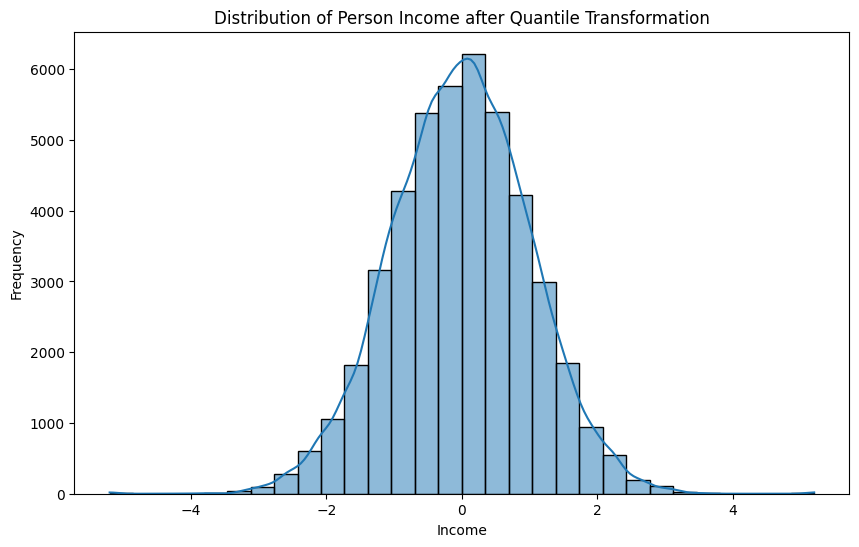

In [165]:
#visualize the distribution of person income after Quantile Transformation
plt.figure(figsize=(10, 6))
sns.histplot(loan['person_income'], kde=True, bins=30)
plt.title('Distribution of Person Income after Quantile Transformation')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

In [170]:
## Splitting the data into X and Y
X = loan.drop(columns=['loan_status'])
y = loan['loan_status']

X.to_csv('datasets/X.csv', index=False)
y.to_csv('datasets/y.csv', index=False)